# "A Basic Neural Network: Differentiate Hand-Written Digits"

- badges: true
- author: Akshith Sriram

### Key Objectives:
- Building a neural network that differentiates two hand-written digits 3 and 8.
- Comparing the results of this Neural Network (NN) to that of a Logistic Regression (LR) model.

### Requirements:
- 'Kudzu' : A neural network library that was designed during our course by [Univ.AI](www.univ.ai). 
- MNIST Database

If MNIST is not installed, use the command `!pip install mnist` given below.
It can be run both from the command line and Jupyter Notebook.

In [1]:
!pip install mnist 

#### Importing necessary libraries

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

### Preparing the Data

In [3]:
import mnist

In [4]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [5]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [7]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


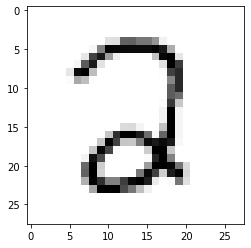

In [8]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [9]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pixel values in the 0 to 1 range

In [10]:
X_train = X_train/255.
X_test = X_test/255.

Setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [11]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [12]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

### Reshape the input data to create a linear array

In [13]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

### Importing appropriate functions from 'Kudzu'

In [14]:
from kudzu.layer import Sigmoid
from kudzu.layer import Relu
from kudzu.layer import Affine, Sigmoid

from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Dataloader, Sampler

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [15]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 251
config.bs = 50

### Initializing data to the variables

In [16]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [17]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.

Help taken from Anshuman's Notebook.

In [18]:
# layers for the Neural Network
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]
model_nn = Model(layers)

# layers for the Logistic Regression
layers_lr = [Affine("logits", 784, 1), Sigmoid("sigmoid")]
model_lr = Model(layers_lr)

In [19]:
# suffix _nn stands for Neural Network.
learner_nn = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(learner_nn, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_nn.set_callbacks([acc_nn])

In [20]:
print("====== Neural Network ======")
learner_nn.train_loop(dl)

====== Neural Network ======


Epoch 0, Loss 0.2553
Training Accuracy: 0.4836, Testing Accuracy: 0.4894



Epoch 10, Loss 0.159
Training Accuracy: 0.8903, Testing Accuracy: 0.9027



Epoch 20, Loss 0.0796
Training Accuracy: 0.9234, Testing Accuracy: 0.9294



Epoch 30, Loss 0.0554
Training Accuracy: 0.9386, Testing Accuracy: 0.9501



Epoch 40, Loss 0.0451
Training Accuracy: 0.9478, Testing Accuracy: 0.9561



Epoch 50, Loss 0.0395
Training Accuracy: 0.9532, Testing Accuracy: 0.9607



Epoch 60, Loss 0.036
Training Accuracy: 0.9565, Testing Accuracy: 0.9642



Epoch 70, Loss 0.0335
Training Accuracy: 0.9597, Testing Accuracy: 0.9652



Epoch 80, Loss 0.0316
Training Accuracy: 0.9626, Testing Accuracy: 0.9672



Epoch 90, Loss 0.0301
Training Accuracy: 0.9647, Testing Accuracy: 0.9682



Epoch 100, Loss 0.0288
Training Accuracy: 0.9661, Testing Accuracy: 0.9703



Epoch 110, Loss 0.0277
Training Accuracy: 0.9669, Testing Accuracy: 0.9723



Epoch 120, Loss 0.0268
Training Accuracy: 0.9688, Testing Accuracy: 0.9728



Epoch 130, Loss 0.0259
Training Accuracy: 0.9701, Testing Accuracy: 0.9733



Epoch 140, Loss 0.0251
Training Accuracy: 0.9710, Testing Accuracy: 0.9733



Epoch 150, Loss 0.0244
Training Accuracy: 0.9715, Testing Accuracy: 0.9733



Epoch 160, Loss 0.0238
Training Accuracy: 0.9720, Testing Accuracy: 0.9743



Epoch 170, Loss 0.0232
Training Accuracy: 0.9728, Testing Accuracy: 0.9738



Epoch 180, Loss 0.0226
Training Accuracy: 0.9744, Testing Accuracy: 0.9733



Epoch 190, Loss 0.0221
Training Accuracy: 0.9752, Testing Accuracy: 0.9743



Epoch 200, Loss 0.0216
Training Accuracy: 0.9755, Testing Accuracy: 0.9743



Epoch 210, Loss 0.0211
Training Accuracy: 0.9759, Testing Accuracy: 0.9748



Epoch 220, Loss 0.0207
Training Accuracy: 0.9761, Testing Accuracy: 0.9748



Epoch 230, Loss 0.0202
Training Accuracy: 0.9770, Testing Accuracy: 0.9753



Epoch 240, Loss 0.0198
Training Accuracy: 0.9777, Testing Accuracy: 0.9753



Epoch 250, Loss 0.0194
Training Accuracy: 0.9784, Testing Accuracy: 0.9743



0.025034372406614755

### Logistic Regression based Implementation.

In [21]:
learner_lr = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(learner_lr, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_lr.set_callbacks([acc_lr])

In [22]:
print("====== Logistic Regression ======")
learner_lr.train_loop(dl)

====== Logistic Regression ======
Epoch 0, Loss 0.2658
Training Accuracy: 0.5782, Testing Accuracy: 0.5842



Epoch 10, Loss 0.1031
Training Accuracy: 0.9104, Testing Accuracy: 0.9153



Epoch 20, Loss 0.0787
Training Accuracy: 0.9286, Testing Accuracy: 0.9325



Epoch 30, Loss 0.0678
Training Accuracy: 0.9377, Testing Accuracy: 0.9420



Epoch 40, Loss 0.0612
Training Accuracy: 0.9427, Testing Accuracy: 0.9501



Epoch 50, Loss 0.0567
Training Accuracy: 0.9461, Testing Accuracy: 0.9511



Epoch 60, Loss 0.0535
Training Accuracy: 0.9478, Testing Accuracy: 0.9536



Epoch 70, Loss 0.0509
Training Accuracy: 0.9500, Testing Accuracy: 0.9567



Epoch 80, Loss 0.0489
Training Accuracy: 0.9515, Testing Accuracy: 0.9587



Epoch 90, Loss 0.0472
Training Accuracy: 0.9533, Testing Accuracy: 0.9607



Epoch 100, Loss 0.0458
Training Accuracy: 0.9543, Testing Accuracy: 0.9622



Epoch 110, Loss 0.0446
Training Accuracy: 0.9557, Testing Accuracy: 0.9627



Epoch 120, Loss 0.0435
Training Accuracy: 0.9562, Testing Accuracy: 0.9632



Epoch 130, Loss 0.0426
Training Accuracy: 0.9566, Testing Accuracy: 0.9642



Epoch 140, Loss 0.0418
Training Accuracy: 0.9570, Testing Accuracy: 0.9647



Epoch 150, Loss 0.0411
Training Accuracy: 0.9577, Testing Accuracy: 0.9642



Epoch 160, Loss 0.0404
Training Accuracy: 0.9583, Testing Accuracy: 0.9647



Epoch 170, Loss 0.0398
Training Accuracy: 0.9586, Testing Accuracy: 0.9657



Epoch 180, Loss 0.0392
Training Accuracy: 0.9591, Testing Accuracy: 0.9667



Epoch 190, Loss 0.0387
Training Accuracy: 0.9594, Testing Accuracy: 0.9667



Epoch 200, Loss 0.0383
Training Accuracy: 0.9599, Testing Accuracy: 0.9667



Epoch 210, Loss 0.0378
Training Accuracy: 0.9603, Testing Accuracy: 0.9667



Epoch 220, Loss 0.0374
Training Accuracy: 0.9606, Testing Accuracy: 0.9667



Epoch 230, Loss 0.037
Training Accuracy: 0.9608, Testing Accuracy: 0.9667



Epoch 240, Loss 0.0367
Training Accuracy: 0.9614, Testing Accuracy: 0.9657



Epoch 250, Loss 0.0363
Training Accuracy: 0.9617, Testing Accuracy: 0.9657



0.011400029324565096

### Comparing results of NN and LR

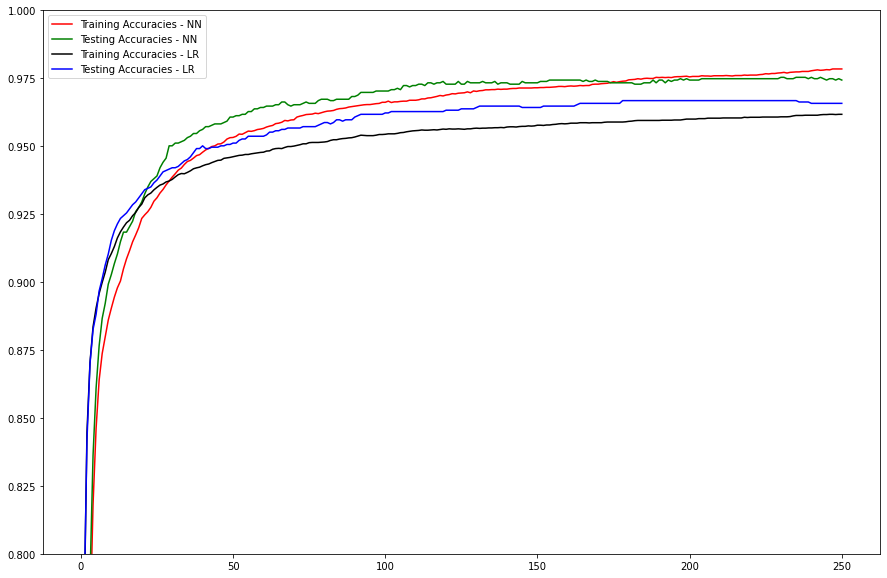

In [23]:
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")

plt.ylim(0.8, 1)

plt.legend()



### From the plot, we can observe the following:
- Neural Network achieves higher accuracy than the Logistic Regression model.
- This apparently, is because of overfitting, i.e. NN captures more noise than data.
- Testing accuracy of NN drops below the Training accuracy at higher epochs. This explains the over-fitting on training data.
- Logistic Regression gives a reliable accuracy, without the above mentioned problem.


### Moving till the last but one layer (excluding it).
#### Plotting the outputs of this layer of the NN.

In [24]:
model_new = Model(layers[:-2])

In [25]:
plot_testing = model_new(testing_xdata)

Text(0.5, 1.0, 'Outputs')

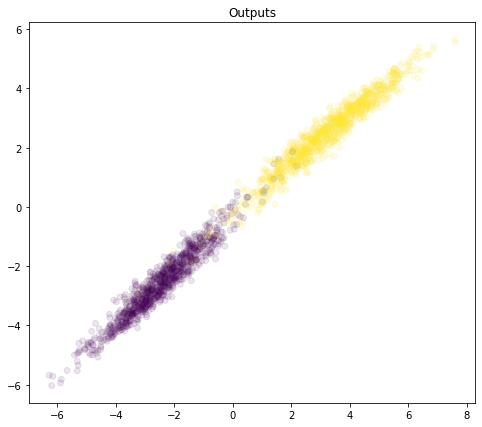

In [26]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

### Plotting probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
# Adjust the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_grid_flat = np.ravel(x_grid)
y_grid_flat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_grid_flat, y_grid_flat)).T

# x_grid and y_grid are of size 100 x 100
probability_contour = model_prob(X).reshape(100,100) 

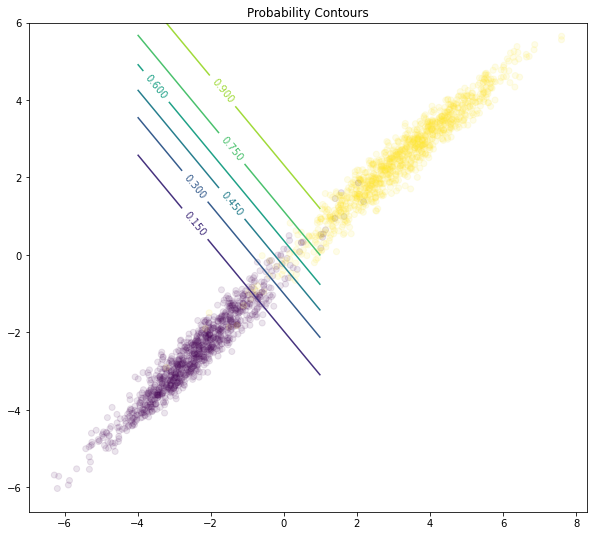

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,probability_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );